# Rain Gauge Quality Comparison - Research Grade Rain Gauges

<b>Maggie Zoerner</b> </br>
SULI Intern</br>
Argonne National Laboratory</br>
Summer 2023</br>

This notebook is a case study for the heavy rainfall that occurred at the ATMOS site on June 11, 12, and 13, 2023! We will compare the performance of the research grade rain gauges, including: 
* Tower 8in Tipping Bucket Rain Gauge
* Wind shielded 8in Tipping Bucket Rain Gauge
* NovaLynx 12in Tipping Bucket Rain Gauge
* Optical Rain Gauge (ORG)
* All Precipitation Gauge (APG)
* FD70 Forward Scatter Sensor

These are also compared to the average of the three CoCoRaHS gauges we have on site.

## Import libraries

In [37]:
import numpy as np
import pandas as pd
import xarray as xr 
import os
import matplotlib.pyplot as plt

## Import ORG/APG Data

In [38]:
ORGAPG_files = "C:/Users/maggi/ANL_Internship_2023/ORG_APG/ORGAPG_0611/*.nc"

In [39]:
ORGAPG_ds = xr.open_mfdataset(ORGAPG_files)

### ORG Data

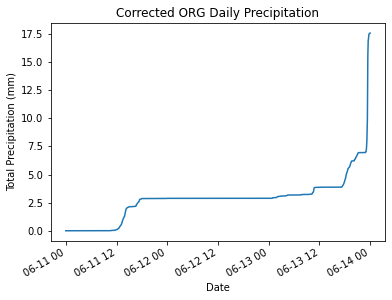

In [40]:
ORG_precip = ORGAPG_ds.ORG_Precip_Accum - ORGAPG_ds.ORG_Precip_Accum[0]
ORG_precip.plot()
plt.title('Corrected ORG Daily Precipitation')
plt.xlabel('Date')
plt.ylabel('Total Precipitation (mm)')
plt.show()

### APG Data

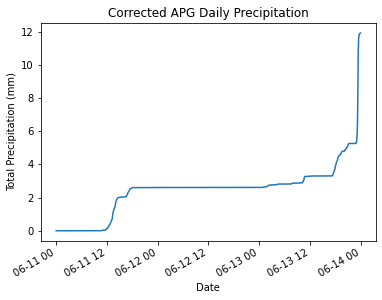

In [41]:
APG_precip = ORGAPG_ds.APG_Precip_Accum - ORGAPG_ds.APG_Precip_Accum[0]
APG_precip.plot()
plt.title('Corrected APG Daily Precipitation')
plt.xlabel('Date')
plt.ylabel('Total Precipitation (mm)')
plt.show()

### 12in Tipping Bucket Data

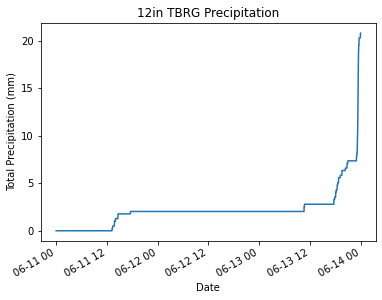

In [42]:
tbrg_12 = np.cumsum(ORGAPG_ds.tb_rain_mm_12in_Tot - ORGAPG_ds.tb_rain_mm_12in_Tot[0])
tbrg_12.plot()
plt.title('12in TBRG Precipitation')
plt.xlabel('Date')
plt.ylabel('Total Precipitation (mm)')
plt.show()

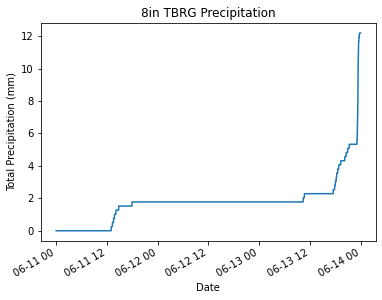

In [43]:
tbrg_8 = np.cumsum(ORGAPG_ds.tb_rain_mm_8in_Tot - ORGAPG_ds.tb_rain_mm_8in_Tot[0])
tbrg_8.plot()
plt.title('8in TBRG Precipitation')
plt.xlabel('Date')
plt.ylabel('Total Precipitation (mm)')
plt.show()

In [44]:
tower_files = "C:/Users/maggi/ANL_Internship_2023/Tower_Rain_Gauge/tower_0611/*.nc"

In [45]:
tower_ds = xr.open_mfdataset(tower_files)

## Plot Tower Data

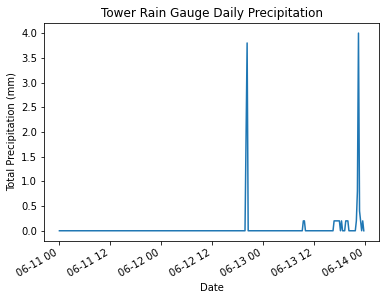

In [46]:
tower_precip = tower_ds.precip
tower_precip.plot()
plt.title('Tower Rain Gauge Daily Precipitation')
plt.xlabel('Date')
plt.ylabel('Total Precipitation (mm)')
plt.show()

Text(0, 0.5, 'Total Precipitation (mm)')

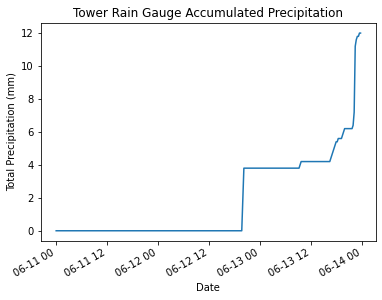

In [47]:
accumulated_tower_precip = np.cumsum(tower_precip)
accumulated_tower_precip.plot()
plt.title('Tower Rain Gauge Accumulated Precipitation')
plt.xlabel('Date')
plt.ylabel('Total Precipitation (mm)')

## Import FD70 Data

In [48]:
FD70_data = "C:/Users/maggi/ANL_Internship_2023/FD70_Rain_Gauge/FD70_0611/*.nc"
FD70_ds = xr.open_mfdataset(FD70_data)

## Plot FD70 Data


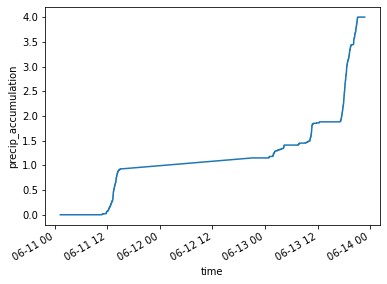

In [49]:
FD70_precip = (FD70_ds.precip_accumulation-FD70_ds.precip_accumulation[0])
FD70_precip.plot()

## Plot data from all rain gauges

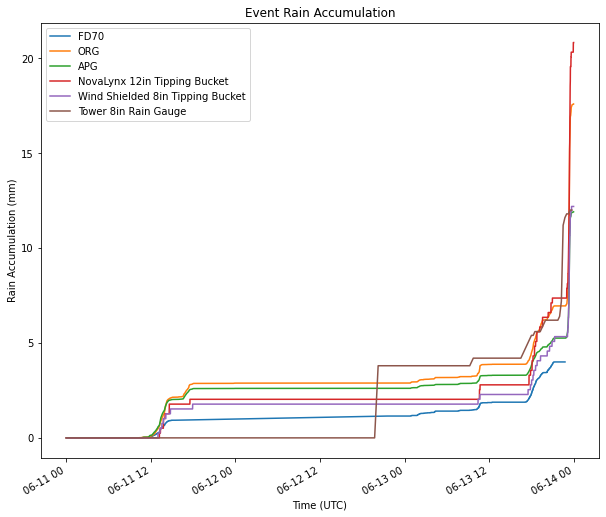

In [50]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 8))

FD70_precip.plot(ax=ax1, label='FD70')
ORG_precip.plot(ax=ax1, label='ORG')
APG_precip.plot(ax=ax1, label='APG')
tbrg_12.plot(ax=ax1, label='NovaLynx 12in Tipping Bucket')
tbrg_8.plot(ax=ax1, label='Wind Shielded 8in Tipping Bucket')
accumulated_tower_precip.plot(ax=ax1, label='Tower 8in Rain Gauge')

ax1.set_title('Event Rain Accumulation')
ax1.set_xlabel('Time (UTC)')
ax1.set_ylabel('Rain Accumulation (mm)')
ax1.legend()
# Show the two plots
plt.show()

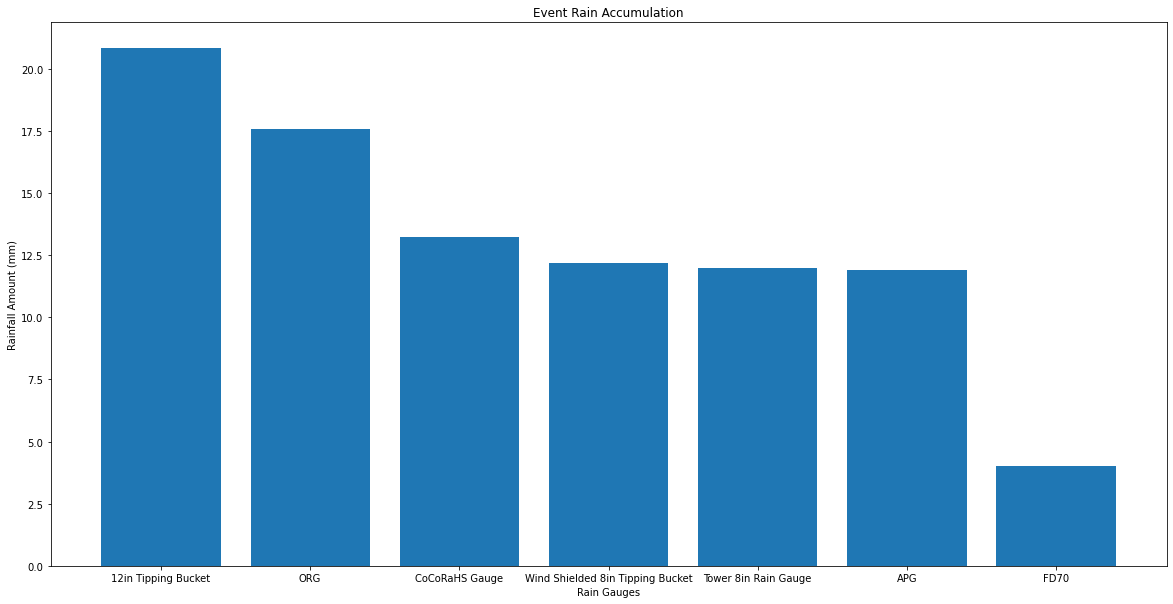

In [53]:
rain_gauge_labels = ['12in Tipping Bucket', 'ORG', 'CoCoRaHS Gauge','Wind Shielded 8in Tipping Bucket', 'Tower 8in Rain Gauge', 'APG','FD70']
rainfall_amounts = [tbrg_12.max(), ORG_precip.max(), 13.208, tbrg_8.max(), accumulated_tower_precip.max(), APG_precip.max(),  FD70_precip.max()]

plt.figure(figsize=(20,10))
plt.bar(rain_gauge_labels, rainfall_amounts)
plt.xlabel('Rain Gauges')
plt.ylabel('Rainfall Amount (mm)')
plt.title('Event Rain Accumulation')
plt.show()

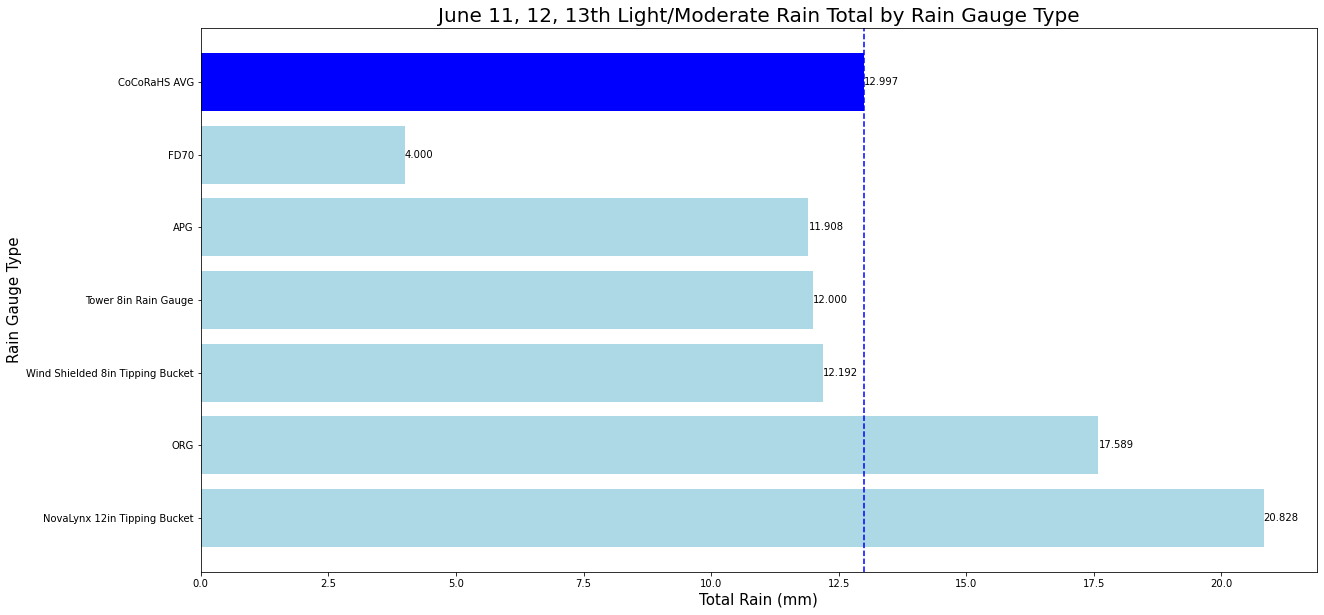

In [63]:
rain_gauge_labels = ['NovaLynx 12in Tipping Bucket', 'ORG', 'Wind Shielded 8in Tipping Bucket', 'Tower 8in Rain Gauge', 'APG','FD70']
rain_gauge_amounts = [tbrg_12.max(), ORG_precip.max(), tbrg_8.max(), accumulated_tower_precip.max(), APG_precip.max(),  FD70_precip.max()]

fig = plt.figure(figsize = (20, 10))
ax=fig.add_subplot(111)
all_rg_bar=plt.barh(rain_gauge_labels, rain_gauge_amounts, color ='lightblue')
ax.bar_label(all_rg_bar, fmt='%.3f')

# Adding and plotting the CoCoRaHS data
crh_bar=ax.barh(['CoCoRaHS AVG'], [12.997], color='b')
ax.bar_label(crh_bar, fmt='%.3f')

# Add a line to be able to more clearly visualize the "true" value of the total event rainfall
plt.axvline(x = 12.997, color = 'b', linestyle='--')

# Plot the graph
plt.ylabel("Rain Gauge Type", fontsize=15)
plt.xlabel("Total Rain (mm)", fontsize=15)
plt.title("June 11, 12, 13th Light/Moderate Rain Total by Rain Gauge Type", fontsize=20)
plt.show()